##Implementation of RBF Network with more than one set of neurons

The following is how to implement a RBF network with Gradien Descent with two subsets of neurons. Each set of neurons will be trained on a different class of MNIST. 


In [0]:
import RBFGrad
from RBFGrad import *
import numpy as np

### Instantiate



In [0]:
layer= RBFLayer()

###1. Add First Set of Neurons







---


In [3]:
layer.add(10)
print ("number of neurons: " + str(layer.num_neurons))

number of neurons: 10


###2. Load Desired Data
The data must be normalized. In the example we will train 10 neurons on MNIST class 0, create another set and train those 10 neurons on MNIST class 4

In [0]:
#for datasets only 
import tensorflow as tf 
(train_data,train_labels),(test_data,test_labels)= tf.keras.datasets.mnist.load_data()
zeros = train_data[np.where(train_labels==0)] #MNIST 0
fours=train_data[np.where(train_labels==4)]  #MNIST 4

In [0]:
input_sample=np.zeros((39,28,28))
input_sample[0:19]=zeros[0:19] #The first 0:19 inputs will be MNIST 0
input_sample[20:39]=fours[0:19] #The second 20:39 inputs will be MNIST 4
input_sample=input_sample.reshape(39,784) 
input_mean = np.mean(input_sample)
input_stdev=np.std(input_sample)
input_sample =input_sample-input_mean
input_sample=input_sample/input_stdev


###3. Load 'Prototype'

Load the prototype of MNIST 0 on 10 neurons.

In [0]:
layer.initialize(input_sample[0])

###4.Train the Neurons Using Similar Samples. 


In [0]:
ctr=0
for i in range(100):
  layer.set_input(input_sample[ctr])
  if ctr<=19:
    layer.trainNeurons(range(0,9))
  ctr=ctr+1
  if ctr>19: 
    ctr=0

### 5. Now add 10 additional neurons, and assign them the prototype of MNIST 4, and train on MNIST data 4

In [0]:
layer.add (10) 
layer.initialize(input_sample[20])

In [0]:
ctr=20    #you want to start at MNIST 4 data only
for i in range(100):
  layer.set_input(input_sample[ctr])
  if ctr<=38:
    layer.trainNeurons(range(10,19))
  ctr=ctr+1
  if ctr>38: 
    ctr=20

###5. Test Neuron

Gather test data, in this case it is MNIST 4 and MNIST 0. 

You will expect that the first set of neurons will have low activation for MNIST 4 as it has been trained on MNIST 0, while the second set will have low activation for MNIST 0, and high activation for for MNIST 4 Both neurons will have low activation for MNIST 4


In [0]:
twos=train_data[np.where(train_labels==2)]
fours = train_data[np.where(train_labels==4)]

In [0]:
testData = np.zeros((41,28,28))
testData[0:20]=fours[41:61] #these are MNIST data that was not present during training
testData[21:41]=zeros[41:61]
testData= testData-input_mean 
testData=testData/input_stdev
testData=testData.reshape(41,784) 


###Reults 

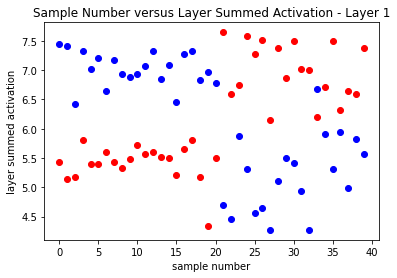

In [12]:
import matplotlib.pyplot as py
neuronSet1=0
neuronSet2=0
py.title('Sample Number versus Layer Summed Activation - Layer 1')
py.xlabel('sample number') 
py.ylabel('layer summed activation')

for i in range(40):
  neuronSet1=(sum(layer.layerOutput(testData[i])[0:9] ))
  neuronSet2=(sum(layer.layerOutput(testData[i])[10:19] ))
  if i<=19: #displaying MNIST 4
    py.scatter(i,neuronSet1,color='red') #Trained on zeros - Expect Low
    py.scatter(i,neuronSet2,color='blue') #Trained on fours - Expect High
  elif i>=20 and i<=40: #displaying MNIST 0.
    py.scatter(i,neuronSet1,color='red') #Trained on zeros -Expect High
    py.scatter(i,neuronSet2,color='blue') #Trained on Fours.  - Expect Low